#### Transiting to Backpropagation
- Let's go back to our simple FNN to put things in perspective
    - Let us ignore non-linearities for now to keep it simpler, but it's just a tiny change subsequently
    - Given a linear transformation on our input (for simplicity instead of an affine transformation that includes a bias): $\hat y = \theta x$
        - $\theta$ is our parameters
        - $x$ is our input
        - $\hat y$ is our prediction
    - Then we have our MSE loss function $L = \frac{1}{2} (\hat y - y)^2$
- We need to calculate our partial derivatives of our loss w.r.t. our parameters to update our parameters: $\nabla_{\theta} = \frac{\delta L}{\delta \theta}$
    - With chain rule we have $\frac{\delta L}{\delta \theta} = \frac{\delta L}{\delta \hat y} \frac{\delta \hat y}{\delta \theta}$
        - $\frac{\delta L}{\delta \hat y} = (\hat y -  y)$
        - $\frac{\delta \hat y}{\delta \theta}$ is our partial derivatives of $y$ w.r.t. our parameters (our gradient) as we have covered previously

In [1]:
import torch
import torch.nn as nn

In [2]:
from sklearn import datasets
from sklearn import preprocessing
iris = datasets.load_iris()
X = torch.tensor(preprocessing.normalize(iris.data[:, :2]), dtype=torch.float)
y = torch.tensor(iris.target.reshape(-1, 1), dtype=torch.float)

In [3]:
print(X.size())
print(y.size())

torch.Size([150, 2])
torch.Size([150, 1])


In [4]:
# We only take 2 classes for demonstration to make a binary classification problem
X = X[:y[y < 2].size()[0]]
y = y[:y[y < 2].size()[0]]

In [5]:
print(X.size())
print(y.size())

torch.Size([100, 2])
torch.Size([100, 1])


In [6]:
class FNN(nn.Module):
    def __init__(self, ):
        super().__init__()
        
        # Dimensions for input, hidden and output
        self.input_dim = 2
        self.hidden_dim = 32
        self.output_dim = 1
        
        # Our parameters (weights)
        self.w1 = torch.randn(self.input_dim, self.hidden_dim) # 3 X 2 tensor
        self.w2 = torch.randn(self.hidden_dim, self.output_dim) # 3 X 1 tensor
    
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    
    def sigmoid_first_order_derivative(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    
    # Forward propagation
    def forward(self, X):
        self.z = torch.matmul(X, self.w1) # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.w2)
        y_hat = self.sigmoid(self.z3) # final activation function
        return y_hat
        
    # Backward propagation
    def backward(self, X, y, y_hat):
        # Cross entropy loss derivative
        self.y_hat_error = y_hat - y
        
        # Follow up
        self.o_delta = self.y_hat_error * self.sigmoid_first_order_derivative(y_hat) # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.w2))
        self.z2_delta = self.z2_error * self.sigmoid_first_order_derivative(self.z2)
        self.w1 -= 0.001 * torch.matmul(torch.t(X), self.z2_delta)
        self.w2 -= 0.001 * torch.matmul(torch.t(self.z2), self.o_delta)

    def train(self, X, y):
        # forward + backward pass for training
        y_hat = self.forward(X)
        self.backward(X, y, y_hat)

In [7]:
model = FNN()
loss_lst = []
for i in range(2000):
    # Get our predictions
    y_hat = model(X)
    
    # Cross entropy loss, remember this can never be negative by nature of the equation
    # But it does not mean the loss can't be negative for other loss functions
    loss = -(y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat))
    loss = torch.mean(loss).detach().item()
    print ("#" + str(i) + " Loss: " + str(loss))  # mean sum squared loss

    loss_lst.append(loss)
    model.train(X, y)

#0 Loss: 2.382725477218628
#1 Loss: 2.3799283504486084
#2 Loss: 2.3771159648895264
#3 Loss: 2.374288558959961
#4 Loss: 2.371445417404175
#5 Loss: 2.368587017059326
#6 Loss: 2.3657126426696777
#7 Loss: 2.3628227710723877
#8 Loss: 2.3599164485931396
#9 Loss: 2.35699462890625
#10 Loss: 2.354055643081665
#11 Loss: 2.3511009216308594
#12 Loss: 2.3481290340423584
#13 Loss: 2.345139980316162
#14 Loss: 2.3421339988708496
#15 Loss: 2.3391103744506836
#16 Loss: 2.336069345474243
#17 Loss: 2.3330111503601074
#18 Loss: 2.329934597015381
#19 Loss: 2.3268396854400635
#20 Loss: 2.3237268924713135
#21 Loss: 2.3205955028533936
#22 Loss: 2.3174450397491455
#23 Loss: 2.3142757415771484
#24 Loss: 2.3110873699188232
#25 Loss: 2.3078792095184326
#26 Loss: 2.3046512603759766
#27 Loss: 2.3014039993286133
#28 Loss: 2.2981364727020264
#29 Loss: 2.294848680496216
#30 Loss: 2.2915396690368652
#31 Loss: 2.2882096767425537
#32 Loss: 2.2848589420318604
#33 Loss: 2.2814865112304688
#34 Loss: 2.278092622756958
#35 Los

#443 Loss: 0.642402172088623
#444 Loss: 0.6421983242034912
#445 Loss: 0.6419946551322937
#446 Loss: 0.6417911648750305
#447 Loss: 0.6415876150131226
#448 Loss: 0.6413843631744385
#449 Loss: 0.6411810517311096
#450 Loss: 0.6409780979156494
#451 Loss: 0.6407749652862549
#452 Loss: 0.6405720710754395
#453 Loss: 0.640369176864624
#454 Loss: 0.6401666402816772
#455 Loss: 0.6399639844894409
#456 Loss: 0.6397616267204285
#457 Loss: 0.6395593881607056
#458 Loss: 0.6393570303916931
#459 Loss: 0.6391547918319702
#460 Loss: 0.6389528512954712
#461 Loss: 0.6387509107589722
#462 Loss: 0.6385490894317627
#463 Loss: 0.6383473873138428
#464 Loss: 0.638145923614502
#465 Loss: 0.6379444003105164
#466 Loss: 0.6377429962158203
#467 Loss: 0.6375417113304138
#468 Loss: 0.6373407244682312
#469 Loss: 0.6371394991874695
#470 Loss: 0.6369385719299316
#471 Loss: 0.6367377638816833
#472 Loss: 0.6365370154380798
#473 Loss: 0.6363365650177002
#474 Loss: 0.636135995388031
#475 Loss: 0.6359355449676514
#476 Loss: 0.6

#883 Loss: 0.5624136924743652
#884 Loss: 0.5622518658638
#885 Loss: 0.5620901584625244
#886 Loss: 0.5619285106658936
#887 Loss: 0.5617669224739075
#888 Loss: 0.5616055130958557
#889 Loss: 0.5614440441131592
#890 Loss: 0.5612828135490417
#891 Loss: 0.5611215233802795
#892 Loss: 0.5609602928161621
#893 Loss: 0.560799241065979
#894 Loss: 0.5606381893157959
#895 Loss: 0.5604773759841919
#896 Loss: 0.5603165030479431
#897 Loss: 0.5601558685302734
#898 Loss: 0.5599950551986694
#899 Loss: 0.5598345398902893
#900 Loss: 0.5596740245819092
#901 Loss: 0.559513509273529
#902 Loss: 0.559353232383728
#903 Loss: 0.5591928958892822
#904 Loss: 0.5590328574180603
#905 Loss: 0.5588725805282593
#906 Loss: 0.5587126016616821
#907 Loss: 0.5585527420043945
#908 Loss: 0.5583928823471069
#909 Loss: 0.5582330226898193
#910 Loss: 0.5580732226371765
#911 Loss: 0.5579138398170471
#912 Loss: 0.5577542781829834
#913 Loss: 0.5575947165489197
#914 Loss: 0.5574353933334351
#915 Loss: 0.5572760701179504
#916 Loss: 0.557

#1328 Loss: 0.4977884292602539
#1329 Loss: 0.4976583421230316
#1330 Loss: 0.49752843379974365
#1331 Loss: 0.4973984658718109
#1332 Loss: 0.4972687065601349
#1333 Loss: 0.4971388876438141
#1334 Loss: 0.49700915813446045
#1335 Loss: 0.4968794882297516
#1336 Loss: 0.4967499077320099
#1337 Loss: 0.4966202676296234
#1338 Loss: 0.4964907765388489
#1339 Loss: 0.49636146426200867
#1340 Loss: 0.49623215198516846
#1341 Loss: 0.49610286951065063
#1342 Loss: 0.4959735870361328
#1343 Loss: 0.4958444833755493
#1344 Loss: 0.49571526050567627
#1345 Loss: 0.4955861568450928
#1346 Loss: 0.495457261800766
#1347 Loss: 0.4953283965587616
#1348 Loss: 0.4951995015144348
#1349 Loss: 0.4950706958770752
#1350 Loss: 0.4949418902397156
#1351 Loss: 0.4948132038116455
#1352 Loss: 0.494684636592865
#1353 Loss: 0.49455615878105164
#1354 Loss: 0.49442756175994873
#1355 Loss: 0.4942990839481354
#1356 Loss: 0.49417078495025635
#1357 Loss: 0.4940425455570221
#1358 Loss: 0.4939142167568207
#1359 Loss: 0.4937860369682312
#

#1826 Loss: 0.44001638889312744
#1827 Loss: 0.4399130940437317
#1828 Loss: 0.4398099482059479
#1829 Loss: 0.4397069215774536
#1830 Loss: 0.4396038055419922
#1831 Loss: 0.4395008087158203
#1832 Loss: 0.43939781188964844
#1833 Loss: 0.4392949044704437
#1834 Loss: 0.4391919672489166
#1835 Loss: 0.4390891194343567
#1836 Loss: 0.43898633122444153
#1837 Loss: 0.43888354301452637
#1838 Loss: 0.438780814409256
#1839 Loss: 0.43867820501327515
#1840 Loss: 0.4385755658149719
#1841 Loss: 0.43847304582595825
#1842 Loss: 0.4383704662322998
#1843 Loss: 0.43826809525489807
#1844 Loss: 0.43816566467285156
#1845 Loss: 0.43806323409080505
#1846 Loss: 0.43796098232269287
#1847 Loss: 0.43785858154296875
#1848 Loss: 0.43775638937950134
#1849 Loss: 0.4376543164253235
#1850 Loss: 0.43755200505256653
#1851 Loss: 0.43744996190071106
#1852 Loss: 0.437347948551178
#1853 Loss: 0.4372458755970001
#1854 Loss: 0.43714389204978943
#1855 Loss: 0.4370420575141907
#1856 Loss: 0.4369402229785919
#1857 Loss: 0.436838299036

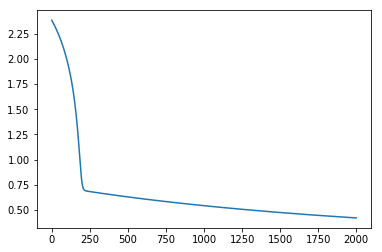

In [13]:
import pandas as pd
%matplotlib inline
pd.Series(loss_lst).plot()